# Quantum Fourier Transform

In [1]:
from qiskit import QuantumCircuit,execute,Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
import math

pi=np.pi

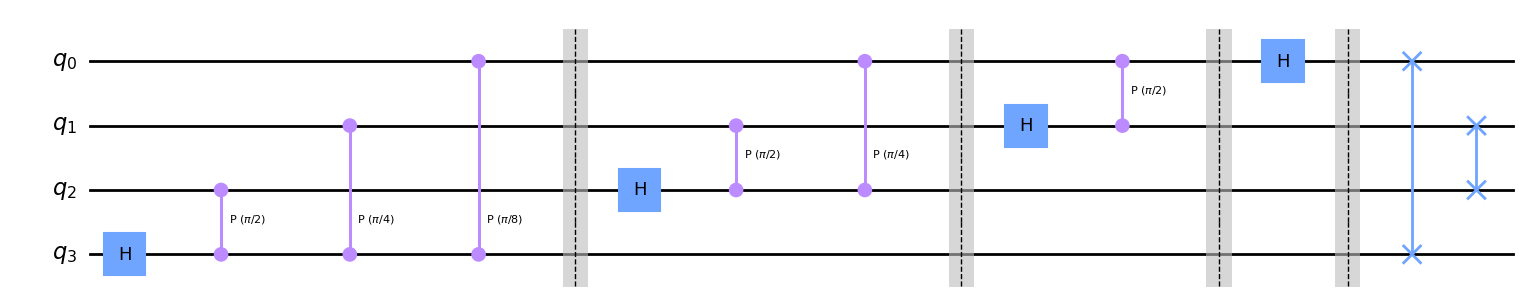

In [2]:
n=4

qftn=QuantumCircuit(n,name='qft')

for i in range(n-1,-1,-1):
    qftn.h(i)
    p=0
    for j in range(i):
        p+=1
        qftn.cp(pi/(2**p),i-j-1,i)
    qftn.barrier()

for i in range(math.floor(n/2)):
    qftn.swap(i,n-1-i)
    
qftn.draw('mpl')


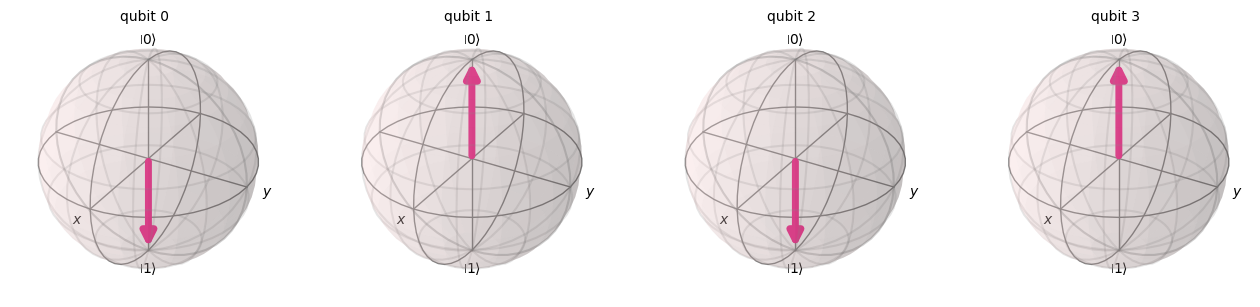

In [3]:
sv=Statevector.from_label('0101')
sv.draw('bloch')

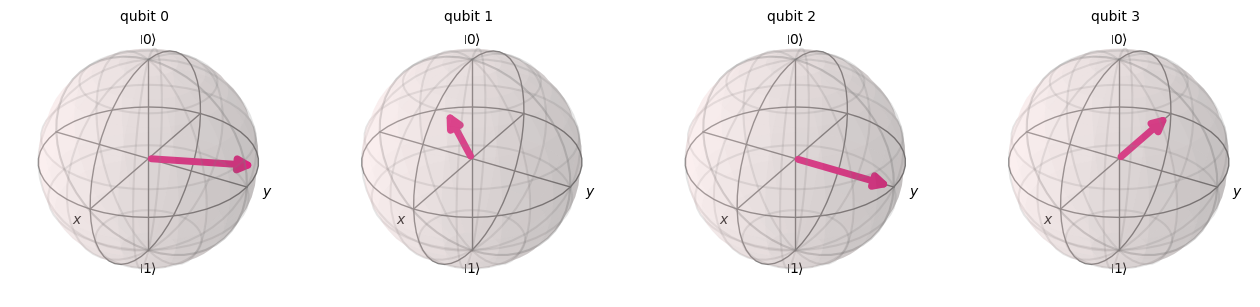

In [4]:
new_sv=sv.evolve(qftn)
new_sv.draw('bloch')

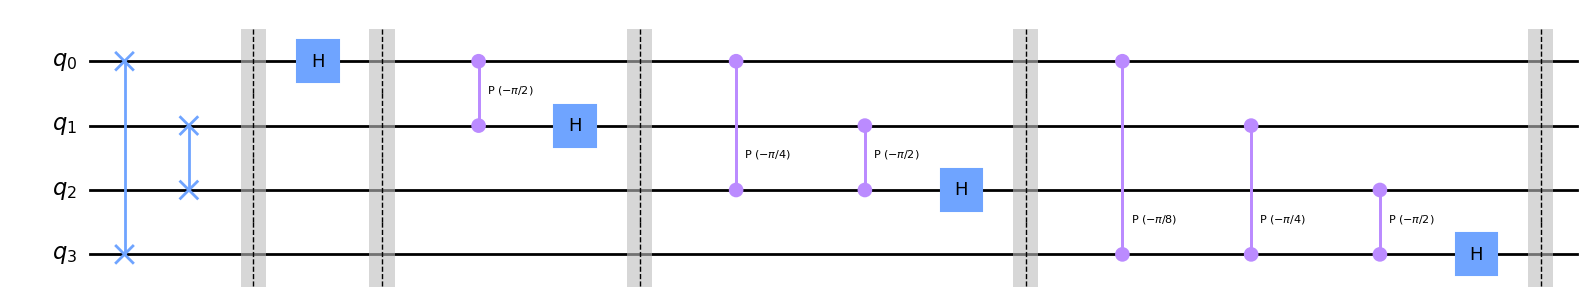

In [5]:
n=4

iqftn=QuantumCircuit(n,name='iqft')

for i in range(math.floor(n/2)):
    iqftn.swap(i,n-1-i)

iqftn.barrier()

for i in range(n):
    p=i+1
    for j in range(i):
        p-=1
        iqftn.cp(-pi/2**p,j,i)
    iqftn.h(i)
    iqftn.barrier()
    
iqftn.draw('mpl')


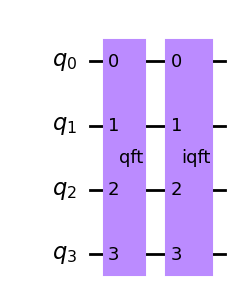

In [6]:
n=4
check=QuantumCircuit(n,name='check')

check.append(qftn,range(n))

check.append(iqftn,range(n))

check.draw('mpl')

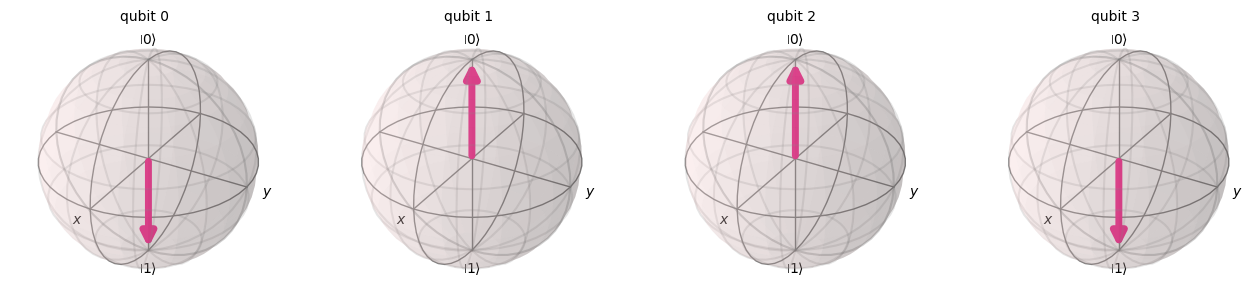

In [7]:
sv=Statevector.from_label('1001')
sv.draw('bloch')

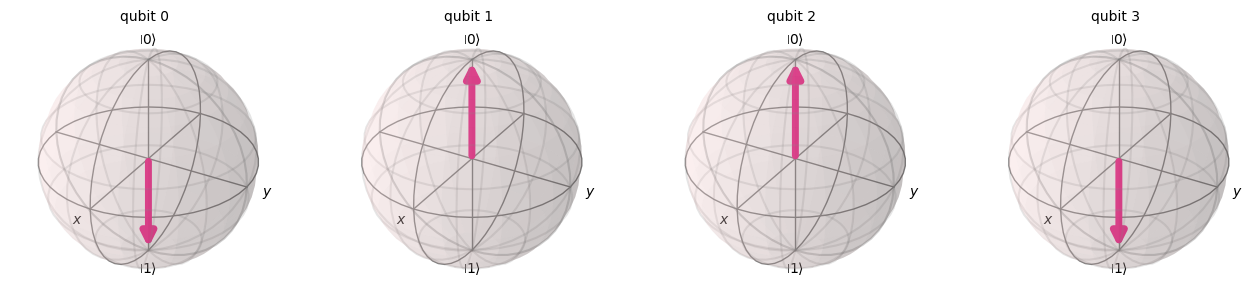

In [8]:
new_sv=sv.evolve(check)
new_sv.draw('bloch')

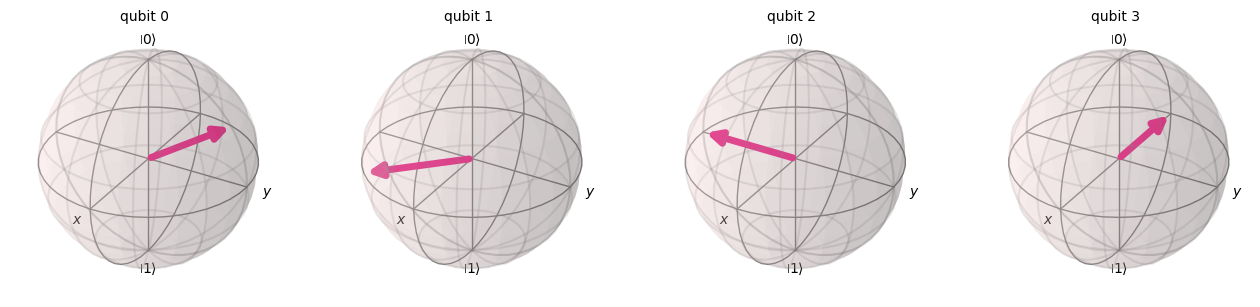

In [9]:
new_sv=sv.evolve(iqftn)
new_sv.draw('bloch')

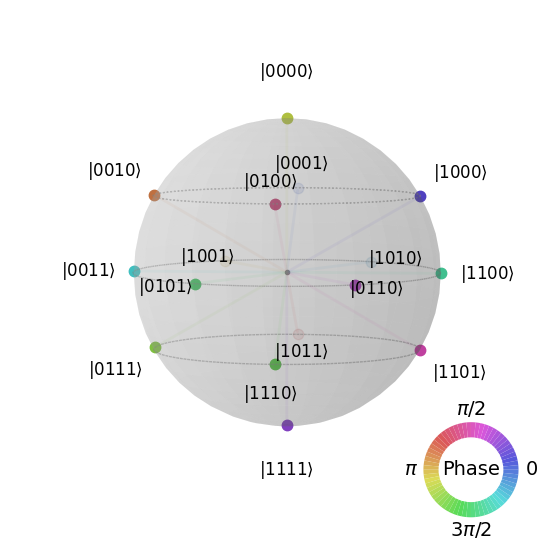

In [10]:
new_sv.draw('qsphere')